## Домашнее задание 3

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn.metrics import mean_squared_error
from sklearn import svm

### Уровень 0

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [8]:
# diagonal + upper/lower triangular matrix
A = np.diag([-1,-1,-1])
print(A)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


In [9]:
# checking orthogonality
check_ortho = np.dot(A, A.T)
print(check_ortho)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [10]:
a, U = np.linalg.eig(diag)
(U @ np.diag(a)) @ np.linalg.inv(U)

array([[-1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0., -1.]])

In [12]:
# det(M) = 1
M = np.array([[2,3],[3,5]])
print(M)

[[2 3]
 [3 5]]


In [13]:
det = np.linalg.det(M)
print(det)

0.9999999999999996


Найдите собственные значения и собственные вектора матриц:

In [169]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [170]:
a, U = linalg.eig(m)

for i in range(len(a)):
    print("Собственное значение " + str(a[i]))
    print("соответствующий ему собственный вектор " + str(U[:,i]))

Собственное значение (1+0j)
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение (4+0j)
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1

#### Задание 1

Найдите спектральное разложение матрицы:

In [172]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


In [173]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


<ipython-input-173-37fa174d601d>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  print(np.array(a, dtype=float))


In [174]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


<ipython-input-174-5b74137712d0>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))


#### Задание 2

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [17]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [18]:
y[0]

0

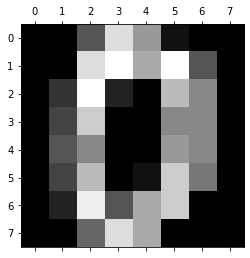

In [19]:
# original dataset
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

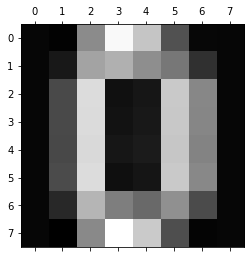

In [20]:
# transforming the first image
pca = decomposition.PCA(n_components=1)
pca.fit(image)
X0_transformed = pca.transform(image)
X0_inverted = pca.inverse_transform(X0_transformed)
plt.matshow(X0_inverted, cmap = 'gray')
plt.show()

In [21]:
# transformed dataset with 6 components
pca = decomposition.PCA(n_components=6)
pca.fit(X)
X_transformed = pca.transform(X)
X_inverted = pca.inverse_transform(X_transformed)

In [22]:
# classification model
clf = svm.SVC(gamma=0.001)
clf.fit(X, y)

SVC(gamma=0.001)

In [23]:
# prediction on transformed data
predicted = clf.predict(X_inverted)

In [24]:
predicted[0]

0

In [25]:
# MSE
mean_squared_error(y, predicted)

2.7985531441291043

In [33]:
# MSE as a function of the # of components
components = []
mse = []

for i in range(1, 65):
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    X_transformed = pca.transform(X)
    X_inverted = pca.inverse_transform(X_transformed)
    clf = svm.SVC(gamma=0.001)
    clf.fit(X, y)
    predicted = clf.predict(X_inverted)
    new = mean_squared_error(y, predicted)
    components.append(i)
    mse.append(new)

In [34]:
# print(components)
# print(mse)

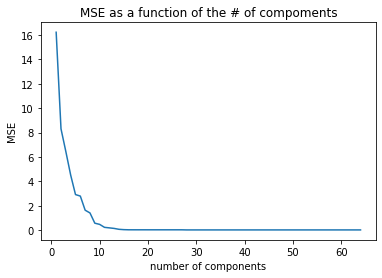

In [35]:
plt.plot(components, mse)
plt.title('MSE as a function of the # of compoments')
plt.xlabel('number of components')
plt.ylabel('MSE')
plt.show()